In [2]:
# importing required packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

### 1)Loading the Dataset

In [4]:
df = pd.read_excel("EastWestAirlines.xlsx",sheet_name ='data')

In [5]:
df.head(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# 2)EDA-Exploratory Data Analysis

In [6]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
df.shape

(3999, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [9]:
df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


In [13]:
df.drop(columns ="ID#",inplace =True)

In [14]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [15]:
df["Qual_miles"].value_counts()

Qual_miles
0       3773
1000      17
500       15
967        4
888        4
        ... 
4116       1
1388       1
1896       1
3692       1
1005       1
Name: count, Length: 164, dtype: int64

# 3)Visualisation

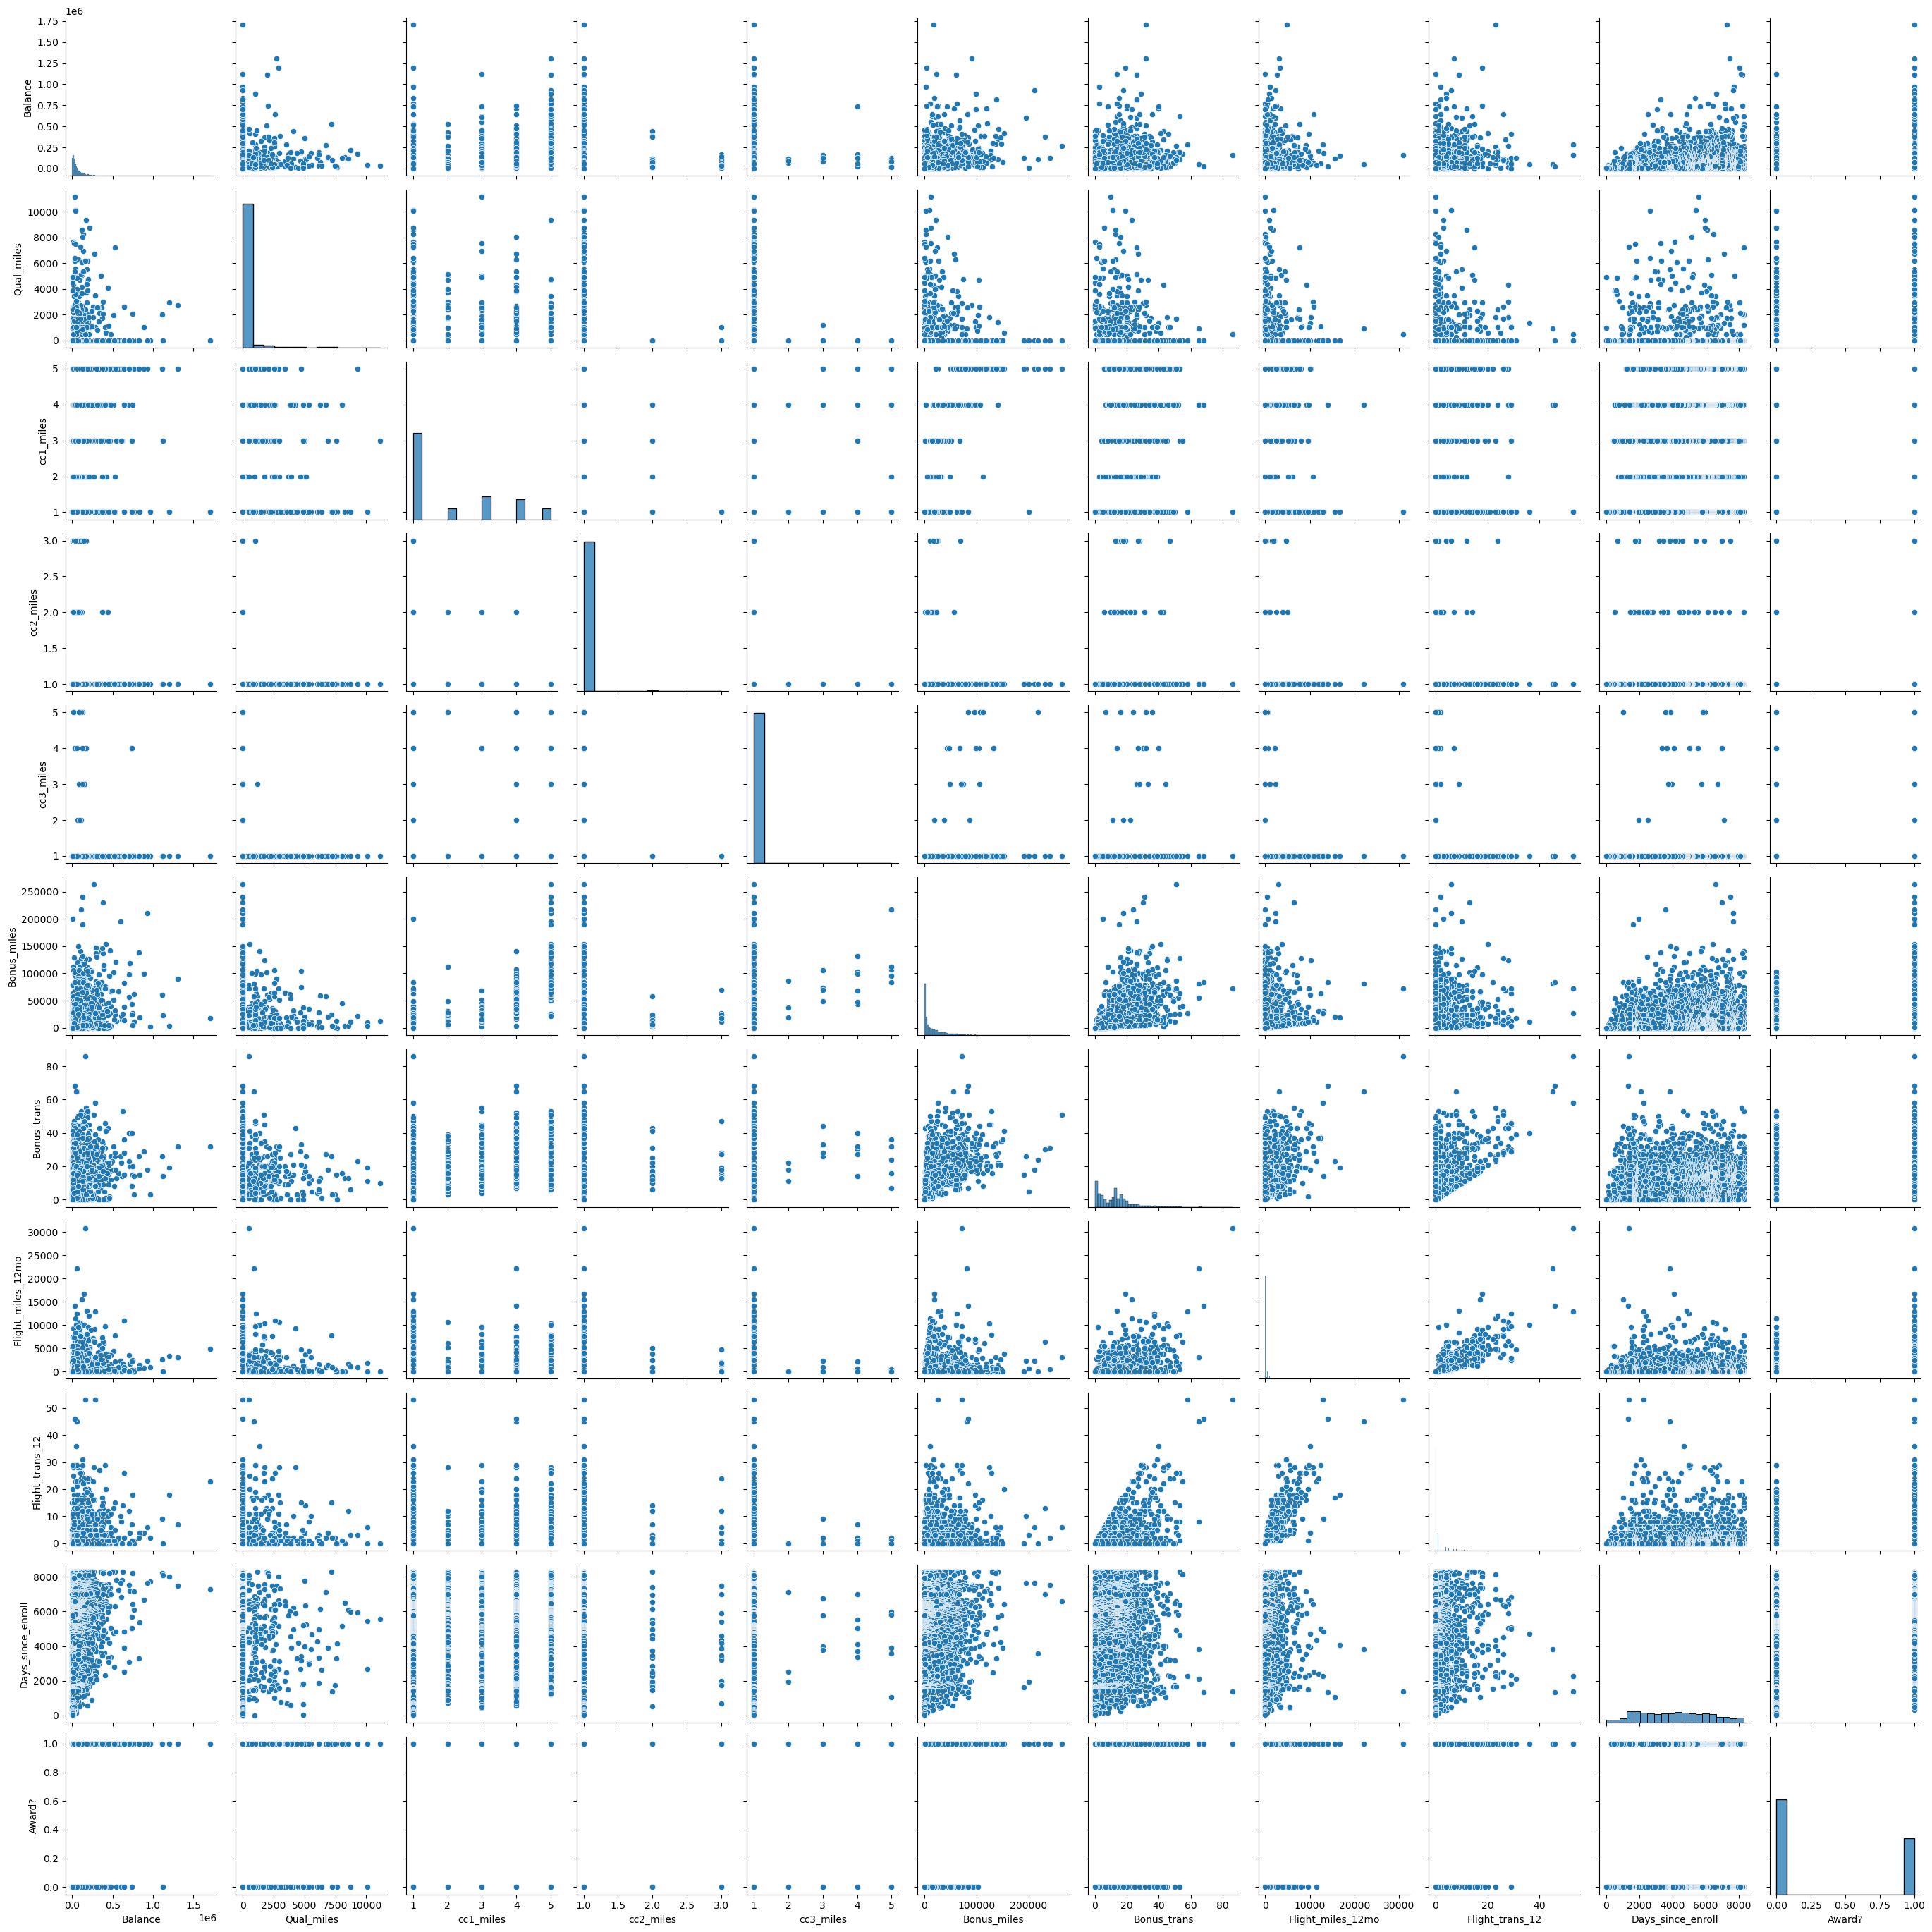

In [16]:
sns.pairplot(df)
plt.tight_layout()
plt.show()

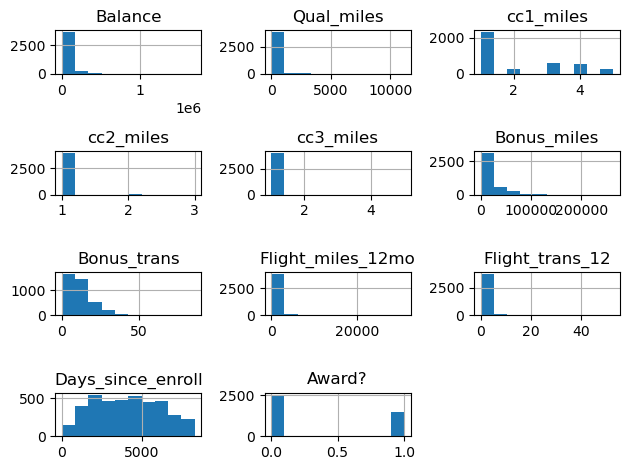

In [17]:
df.hist()
plt.tight_layout()
plt.show()

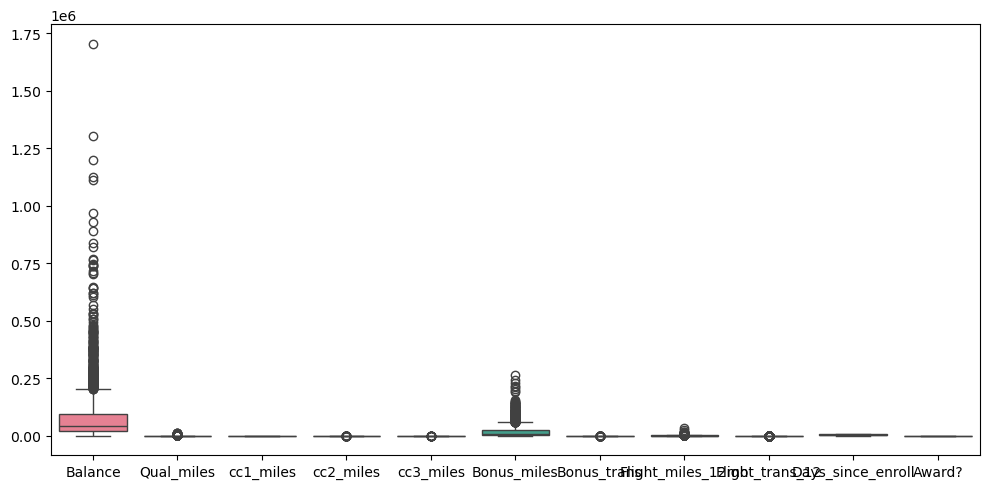

In [19]:
plt.figure(figsize =(10,5))
sns.boxplot(df)
plt.tight_layout()
plt.show()

In [20]:
def outlier_detection(df,columns):
    for col in columns:
        Q1 =df[col].quantile(0.25)
        Q3 =df[col].quantile(0.75)
        iqr =Q3-Q1
        upper =Q3+1.5*iqr
        lower =Q1-1.5*iqr
        df[col] =df[col].clip(lower,upper)
    return df

In [21]:
df = outlier_detection(df, ['Balance', 'Qual_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12'])


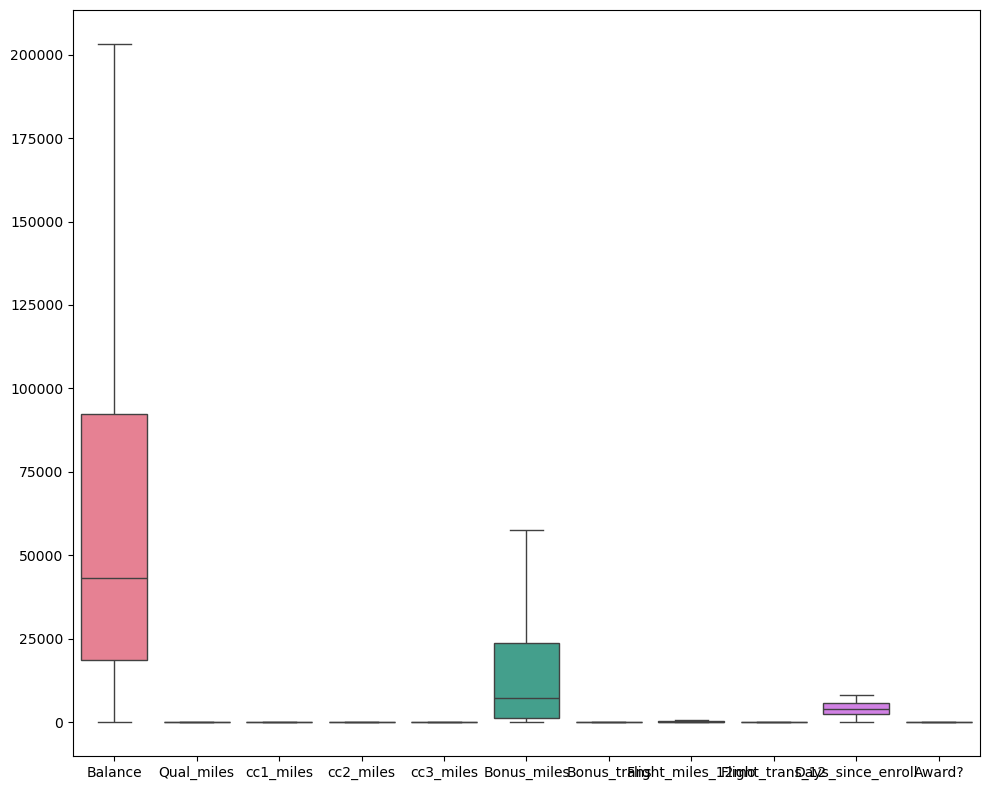

In [22]:
plt.figure(figsize =(10,8))
sns.boxplot(df)
plt.tight_layout()
plt.show()

In [25]:
df.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143.0,0,1,1,1,174.0,1,0.0,0.0,7000,0
1,19244.0,0,1,1,1,215.0,2,0.0,0.0,6968,0


In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[-0.60725829,  0.        , -0.76957841, ..., -0.62614341,
         1.39545434, -0.7669193 ],
       [-0.75894657,  0.        , -0.76957841, ..., -0.62614341,
         1.37995704, -0.7669193 ],
       [-0.38206963,  0.        , -0.76957841, ..., -0.62614341,
         1.41192021, -0.7669193 ],
       ...,
       [ 0.1675298 ,  0.        ,  0.68312117, ..., -0.62614341,
        -1.31560393,  1.30391816],
       [-0.15118775,  0.        , -0.76957841, ...,  0.43238439,
        -1.31608822, -0.7669193 ],
       [-1.03556163,  0.        , -0.76957841, ..., -0.62614341,
        -1.31754109, -0.7669193 ]])

# 4.Implementing Clustering Algorithms:

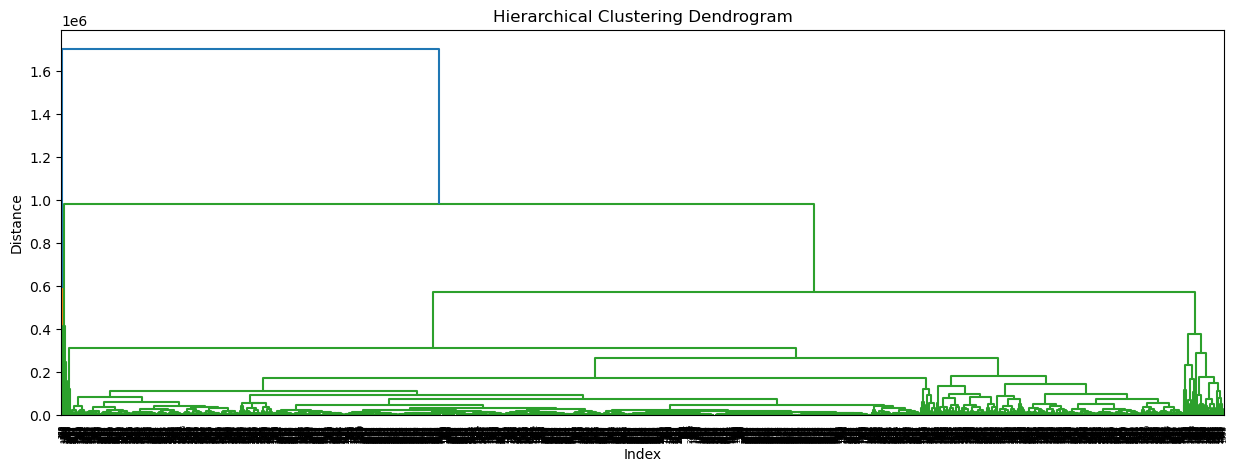

In [98]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
)
plt.show()


## 5)AgglomerativeClustering

In [29]:
from sklearn.cluster import AgglomerativeClustering 
ag = AgglomerativeClustering(n_clusters=7, linkage='complete',metric = "euclidean")
y_ad = ag.fit_predict(x)
y_ad

array([1, 1, 1, ..., 5, 1, 5], dtype=int64)

In [30]:
df["clusters"] = pd.DataFrame(y_ad,columns =["clusters"])

In [31]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,28143.0,0,1,1,1,174.0,1,0.0,0.0,7000,0,1
1,19244.0,0,1,1,1,215.0,2,0.0,0.0,6968,0,1
2,41354.0,0,1,1,1,4123.0,4,0.0,0.0,7034,0,1
3,14776.0,0,1,1,1,500.0,1,0.0,0.0,6952,0,1
4,97752.0,0,4,1,1,43300.0,26,777.5,2.5,6935,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0,1,1,1,8525.0,4,200.0,1.0,1403,1,5
3995,64385.0,0,1,1,1,981.0,5,0.0,0.0,1395,1,5
3996,73597.0,0,3,1,1,25447.0,8,0.0,0.0,1402,1,5
3997,54899.0,0,1,1,1,500.0,1,500.0,1.0,1401,0,1


# 6)K-mean

In [33]:
from sklearn.cluster import KMeans

In [34]:
df=pd.read_excel("EastWestAirlines.xlsx" ,sheet_name = 'data')

In [35]:
df.head(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [36]:
from sklearn.preprocessing import StandardScaler
sc =StandarddScaler()

In [37]:
scaled_df =sc.fit_transform(df.iloc[:,1:])

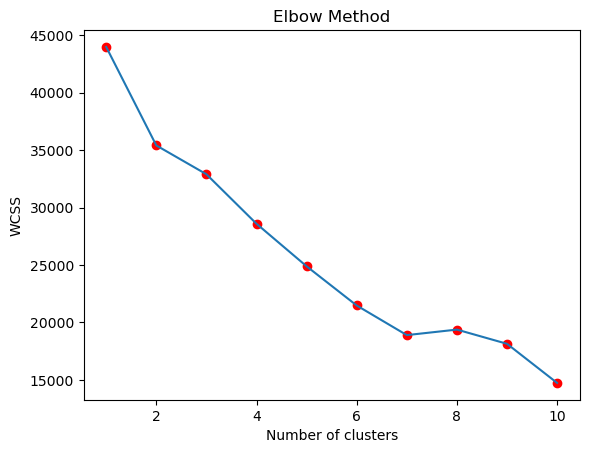

In [39]:
wcss =[]
for i in range(1,11):
    kmeans =KMeans(n_clusters =i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.scatter(range(1,11),wcss,color ="red")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [40]:
from sklearn.cluster import KMeans

In [41]:
kmean = KMeans(n_clusters=4,random_state=60)
kmean.fit(scaled_df)

KMeans(n_clusters=4, random_state=60)

In [43]:
kmean.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [44]:
df["cluster_id"] = kmean.labels_

In [46]:
kmean.cluster_centers_

array([[-2.95359287e-01, -6.48857859e-02, -6.08040496e-01,
         3.21733694e-02, -6.07538013e-02, -5.15083406e-01,
        -4.86722508e-01, -1.86356652e-01, -1.98581895e-01,
        -2.06019589e-01, -3.48683364e-01],
       [ 4.27184139e-01, -8.16348377e-03,  1.19735618e+00,
        -8.22033502e-02, -5.46805159e-02,  9.18247247e-01,
         7.46836597e-01, -9.24025605e-02, -1.02041056e-01,
         3.74188094e-01,  5.73322781e-01],
       [ 1.16774007e+00,  1.02758112e+00,  8.76832606e-02,
         1.38046790e-01, -6.27665798e-02,  5.80073471e-01,
         1.55085819e+00,  3.43518798e+00,  3.68477621e+00,
         2.71078190e-01,  9.06606321e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01]])

In [48]:
df.groupby('cluster_id').agg(['mean']).reset_index()

,cluster_id,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2241.967413,43844.504515,93.847271,1.223793,1.019238,1.000393,4714.495485,6.934040,198.993718,0.619945,3695.257558,0.201806
1,1,1598.917787,116751.790514,138.017391,3.709091,1.002372,1.001581,39357.536759,18.780237,331.211858,0.988142,4888.871146,0.648221
2,2,1740.511628,191266.395349,939.017442,2.180233,1.034884,1.000000,31152.430233,26.494186,5269.436047,15.348837,4678.302326,0.808140
3,3,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


In [49]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


# 7)DBSCAN

In [51]:
from sklearn.cluster import DBSCAN

In [52]:
df =pd.read_excel("EastWestAirlines.xlsx" ,sheet_name = 'data')

In [53]:
df.head(2)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0


In [54]:
df_1=df.drop(columns=['cc1_miles', 'cc2_miles', 'cc3_miles','ID#','Award?'],axis=1)

In [55]:
df_1.head(3)

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034


In [58]:
sc = StandardScaler()
x =sc.fit_transform(df_1)

In [59]:
model =DBSCAN(eps =1.1,min_samples =3)
model.fit(x)

DBSCAN(eps=1.1, min_samples=3)

In [89]:
df_1["cluster"] = model.labels_

In [90]:
df_1["cluster"].value_counts()

cluster
 0    3181
-1     792
 3       5
 4       5
 5       5
 1       4
 2       4
 6       3
Name: count, dtype: int64

In [91]:
model= DBSCAN(eps=0.6, min_samples=4)
model.fit(x) 

DBSCAN(eps=0.6, min_samples=4)

In [92]:
model.labels_


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
df1["cluster"].value_counts()

cluster
 0    3660
-1     316
 3       8
 1       5
 5       4
 2       3
 4       3
Name: count, dtype: int64

In [93]:
df_1.iloc[:,1:].groupby('cluster').agg(['mean']).reset_index()

,cluster,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,,mean,mean,mean,mean,mean,mean
0,-1,712.189394,36542.108586,20.154040,1870.210859,5.424242,4670.296717
1,0,0.000000,12281.092424,9.495442,105.013518,0.348633,3986.695693
2,1,0.000000,56023.750000,14.000000,0.000000,0.000000,6349.750000
3,2,0.000000,63595.750000,16.500000,750.000000,1.750000,5969.750000
4,3,0.000000,5250.000000,3.800000,330.000000,2.600000,3187.000000
5,4,2452.000000,1625.000000,1.200000,0.000000,0.000000,2005.000000
6,5,0.000000,5094.200000,10.200000,2998.200000,8.600000,1760.000000
7,6,0.000000,5470.333333,10.333333,1622.333333,8.333333,1842.333333


In [94]:
df_1

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,28143,0,174,1,0,0,7000,0
1,19244,0,215,2,0,0,6968,0
2,41354,0,4123,4,0,0,7034,0
3,14776,0,500,1,0,0,6952,0
4,97752,0,43300,26,2077,4,6935,-1
...,...,...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1,1403,0
3995,64385,0,981,5,0,0,1395,0
3996,73597,0,25447,8,0,0,1402,0
3997,54899,0,500,1,500,1,1401,0


In [83]:
df.shape

(3999, 14)

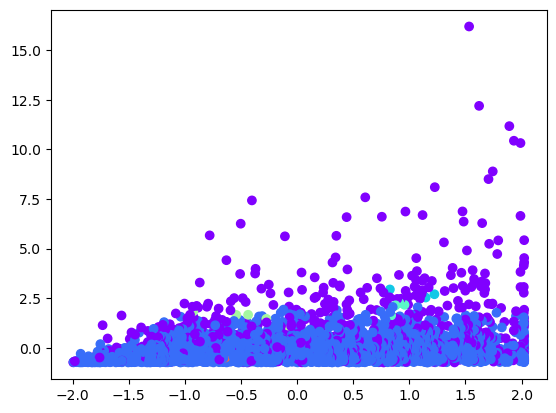

In [97]:
plt.scatter(x[:,6],x[:,0],c=y,cmap='rainbow')
